In [111]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

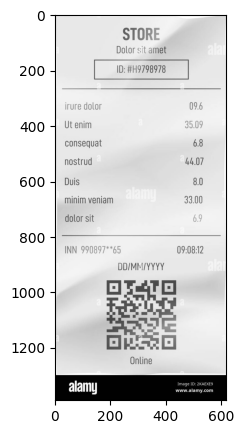

In [117]:
img=cv2.imread("../img/bill-receipt.jpg")

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

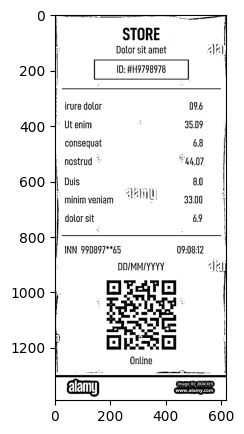

In [118]:
V=cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2HSV))[2]
from skimage.filters import threshold_local
T=threshold_local(V,25,offset=5,method="gaussian")

thresh=(V>T).astype("uint8")*255
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(thresh,cmap="gray")
plt.show()

In [119]:
import pytesseract as pyt

In [120]:
pyt.pytesseract.tesseract_cmd="C:\\Users\\Administrator\\AppData\\Local\\Tesseract-OCR\\tesseract.exe"
ocr_text=pyt.image_to_string(thresh)
print(ocr_text)

STORE

1! Dolor sit amet

ID: #9798978

4]

a

irure dolor 09.6
Ut enim : 35.09
consequat 6.8
| nostrud * 44,07
e 8.0
i minim veniam alk THU 33.00
dolor sit 69
INN 990897**65 09:08:12
DD/MMIYYYY
Oo yal
ae Ges G)
Online

Image je ID: ‘2KAEXES,
‘www.alamy.com



In [121]:
from pytesseract import Output
d=pyt.image_to_data(thresh,output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


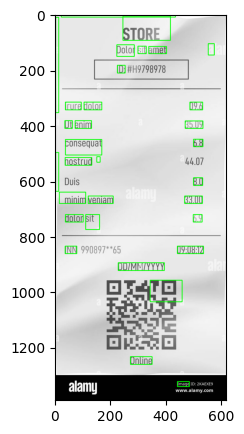

In [122]:
n_boxes=len(d["text"])
newImg=img.copy()
for i in range(n_boxes):
    if int(d["conf"][i])>60:
        (x,y,w,h)=(d["left"][i],d["top"][i],d["width"][i],d["height"][i])
        newImg=cv2.rectangle(newImg,(x,y),(x+w,y+h),(0,255,0),2)
plt.figure(figsize=(14, 5))
plt.imshow(newImg, cmap="gray")
plt.show()